<a href="https://colab.research.google.com/github/33Martin22/Accoustic-Mosquito-Classification-Model/blob/main/Acoustic_MosquitoMSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connecting with google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/all_audio.tar" /content/


In [ ]:
!mkdir -p /content/all_audio_extracted/
!tar -xvf /content/all_audio.tar -C /content/all_audio_extracted/


Streaming output truncated to the last 5000 lines.
all_audio/Ae_aegypti_28271.wav
all_audio/Ae_aegypti_38477.wav
all_audio/C_quinquefasciatus_248223.wav
all_audio/C_quinquefasciatus_210057.wav
all_audio/Ae_aegypti_39140.wav
all_audio/C_pipiens_201759.wav
all_audio/C_quinquefasciatus_226746.wav
all_audio/Ae_aegypti_57984.wav
all_audio/Ae_aegypti_24444.wav
all_audio/C_quinquefasciatus_252720.wav
all_audio/Ae_aegypti_42397.wav
all_audio/C_quinquefasciatus_242634.wav
all_audio/C_quinquefasciatus_244703.wav
all_audio/Ae_albopictus_92839.wav
all_audio/C_pipiens_177711.wav
all_audio/Ae_aegypti_12044.wav
all_audio/An_arabiensis_121283.wav
all_audio/C_pipiens_195270.wav
all_audio/C_quinquefasciatus_235662.wav
all_audio/An_gambiae _150053.wav
all_audio/Ae_aegypti_77072.wav
all_audio/Ae_aegypti_75172.wav
all_audio/C_quinquefasciatus_223199.wav
all_audio/C_quinquefasciatus_244683.wav
all_audio/C_quinquefasciatus_224731.wav
all_audio/Ae_aegypti_44219.wav
all_audio/Ae_aegypti_38740.wav
all_audio/Ae_

#loading neccesary libraries


In [ ]:
#importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa

#loading dataset

In [ ]:
#loading the dataset both excel containing the metadata and the audio file
metadata=pd.read_csv("/content/drive/MyDrive/kagglesounddataset.csv")
print(metadata.head())
audio_path="all_audio_extracted/all_audio"
# Add new column with full path to each audio file
metadata["AudioPath"] = metadata["fieldid "].apply(
    lambda x: os.path.join(audio_path, f"{x}.WAV")
)

print(metadata.isnull().sum())
print(metadata['AudioPath'].count())

print(metadata["species"].value_counts())

print(metadata.head())


   id                 filename species 001               field   \
0   1  ./Ae_aegypti_100013.wav  Ae_aegypti  ./Ae_aegypti_100013   
1   2  ./Ae_aegypti_100014.wav  Ae_aegypti  ./Ae_aegypti_100014   
2   3  ./Ae_aegypti_100015.wav  Ae_aegypti  ./Ae_aegypti_100015   
3   4  ./Ae_aegypti_100016.wav  Ae_aegypti  ./Ae_aegypti_100016   
4   5  ./Ae_aegypti_100017.wav  Ae_aegypti  ./Ae_aegypti_100017   

         fieldid      species  
0  Ae_aegypti_003  Ae_aegypti  
1  Ae_aegypti_004  Ae_aegypti  
2  Ae_aegypti_005  Ae_aegypti  
3  Ae_aegypti_006  Ae_aegypti  
4  Ae_aegypti_009  Ae_aegypti  
id             0
filename       0
species 001    0
field          0
fieldid        0
species        0
AudioPath      0
dtype: int64
279566
species
Ae_aegypti            85553
C_quinquefasciatus    74599
An_gambiae            49471
C_pipiens             30415
Ae_albopictus         20231
An_arabiensis         19297
Name: count, dtype: int64
   id                 filename species 001               field  

In [ ]:
metadata.columns = metadata.columns.str.strip()
metadata["species"] = metadata["species"].str.strip()


In [ ]:
required_species=["Ae_aegypti","C_quinquefasciatus","Ae_albopictus","An_gambiae"]
metadata=metadata[metadata["species"].isin(required_species)]
print(metadata["species"].value_counts())
print(metadata.head())

species
Ae_aegypti            85553
C_quinquefasciatus    74599
An_gambiae            49471
Ae_albopictus         20231
Name: count, dtype: int64
   id                 filename species 001                field  \
0   1  ./Ae_aegypti_100013.wav  Ae_aegypti  ./Ae_aegypti_100013   
1   2  ./Ae_aegypti_100014.wav  Ae_aegypti  ./Ae_aegypti_100014   
2   3  ./Ae_aegypti_100015.wav  Ae_aegypti  ./Ae_aegypti_100015   
3   4  ./Ae_aegypti_100016.wav  Ae_aegypti  ./Ae_aegypti_100016   
4   5  ./Ae_aegypti_100017.wav  Ae_aegypti  ./Ae_aegypti_100017   

          fieldid     species  \
0  Ae_aegypti_003  Ae_aegypti   
1  Ae_aegypti_004  Ae_aegypti   
2  Ae_aegypti_005  Ae_aegypti   
3  Ae_aegypti_006  Ae_aegypti   
4  Ae_aegypti_009  Ae_aegypti   

                                          AudioPath  
0  all_audio_extracted/all_audio/Ae_aegypti_003.WAV  
1  all_audio_extracted/all_audio/Ae_aegypti_004.WAV  
2  all_audio_extracted/all_audio/Ae_aegypti_005.WAV  
3  all_audio_extracted/all_audio/Ae_

#subsampling dataset

In [ ]:
# Subsample the dataset to 20000 samples per species
subsampled_metadata = metadata.groupby('species').apply(lambda x: x.sample(min(len(x), 20000), random_state=42)).reset_index(drop=True)
metadata = subsampled_metadata # Update metadata with the subsampled data

print("\nSubsampled dataset distribution:")
print(metadata["species"].value_counts())
print("\nSubsampled metadata head:")
print(metadata.head())


Subsampled dataset distribution:
species
Ae_aegypti            20000
Ae_albopictus         20000
An_gambiae            20000
C_quinquefasciatus    20000
Name: count, dtype: int64

Subsampled metadata head:
       id                 filename species 001                field  \
0  108073    ./C_pipiens_17316.wav   C_pipiens    ./C_pipiens_17316   
1  104540    ./C_pipiens_14089.wav   C_pipiens    ./C_pipiens_14089   
2   18046  ./Ae_aegypti_168264.wav  Ae_aegypti  ./Ae_aegypti_168264   
3  107459     ./C_pipiens_1672.wav   C_pipiens     ./C_pipiens_1672   
4    6805   ./Ae_aegypti_91252.wav  Ae_aegypti   ./Ae_aegypti_91252   

            fieldid     species  \
0  Ae_aegypti_22840  Ae_aegypti   
1  Ae_aegypti_12939  Ae_aegypti   
2  Ae_aegypti_50302  Ae_aegypti   
3  Ae_aegypti_21125  Ae_aegypti   
4  Ae_aegypti_19101  Ae_aegypti   

                                           AudioPath  
0  all_audio_extracted/all_audio/Ae_aegypti_22840...  
1  all_audio_extracted/all_audio/Ae_aegypti_1

/tmp/ipython-input-57949833.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subsampled_metadata = metadata.groupby('species').apply(lambda x: x.sample(min(len(x), 20000), random_state=42)).reset_index(drop=True)


#comfirming the audio paths exist


In [ ]:


# List all audio files in the directory
all_audio_files = os.listdir(audio_path)
print("Total audio files found in directory:", len(all_audio_files))



# Build lookup dictionary
file_lookup = {}
for f in all_audio_files:
    filename = os.path.splitext(f)[0]

    file_lookup[filename] = os.path.join(audio_path, f)

# Map matched file paths
metadata["AudioPath"] = metadata["fieldid"].map(file_lookup)
print("Audio paths assigned:", metadata['AudioPath'].notnull().sum(), "/", len(metadata))
print("Missing paths:", metadata['AudioPath'].isnull().sum())


Total audio files found in directory: 279566
Audio paths assigned: 80000 / 80000
Missing paths: 0


#filling missing value on the species column

In [ ]:
#EDA ON MOSQUITO SOUNDS


sampling_rates = []
signal_lengths = []

for index, row in metadata.iterrows():
    audio_path = row["AudioPath"]
    try:
        signal, sr = librosa.load(audio_path, sr=None)
        sampling_rates.append(sr)
        signal_lengths.append(len(signal))
    except Exception as e:
        print(f"❌ Error loading {audio_path}: {type(e).__name__} - {e}")
        sampling_rates.append(None)
        signal_lengths.append(None)

# Add the sampling rates and signal lengths to the DataFrame
metadata['sampling_rate'] = sampling_rates
metadata['signal_length'] = signal_lengths

# Calculate duration in seconds
metadata['duration_seconds'] = metadata['signal_length'] / metadata['sampling_rate']

# Calculate and print the minimum, maximum, and mean duration
min_duration = metadata['duration_seconds'].min()
max_duration = metadata['duration_seconds'].max()
mean_duration = metadata['duration_seconds'].mean()

print(f"Minimum Duration: {min_duration:.4f} seconds")
print(f"Maximum Duration: {max_duration:.4f} seconds")
print(f"Mean Duration: {mean_duration:.4f} seconds")

Minimum Duration: 0.6250 seconds
Maximum Duration: 0.6250 seconds
Mean Duration: 0.6250 seconds


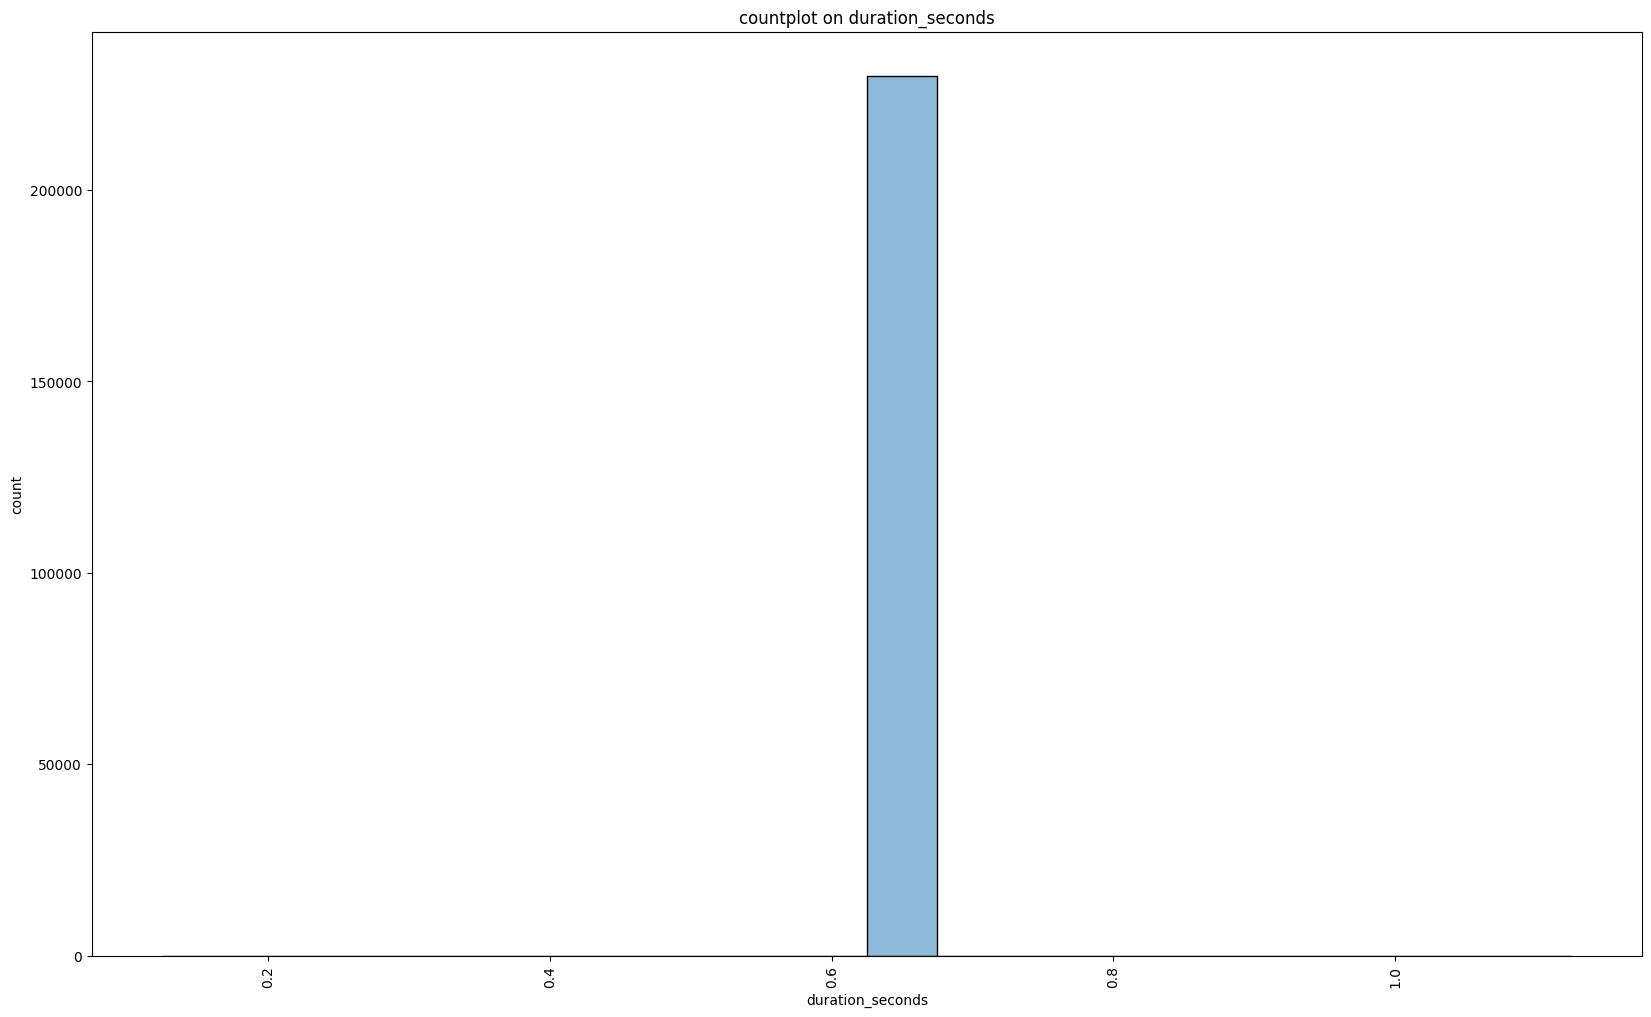

In [ ]:
plt.figure(figsize=(20,12))
sns.histplot(data=metadata,x="duration_seconds",bins=20,kde="True")
plt.xlabel("duration_seconds")
plt.ylabel("count")
plt.title("countplot on duration_seconds")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3473522724.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metadata_sample = metadata.groupby("species").apply(lambda x: x.sample(1,random_state=42)).reset_index(drop=True)


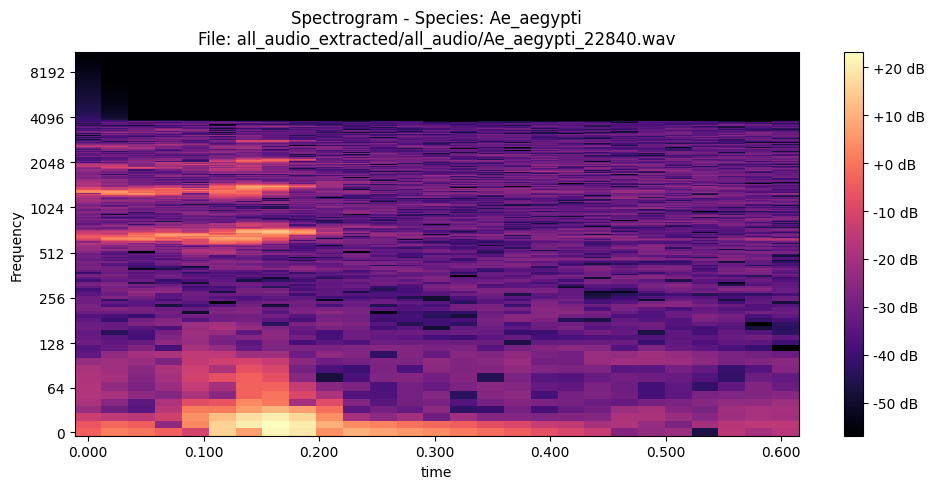

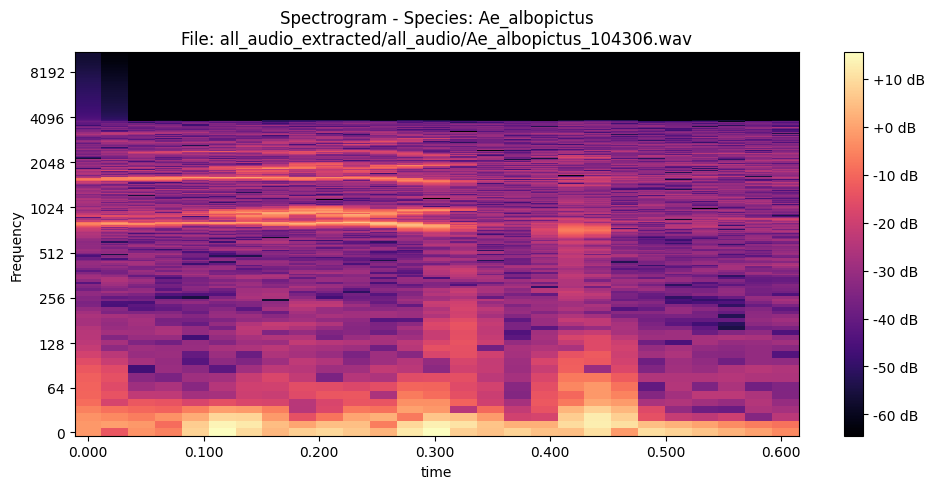

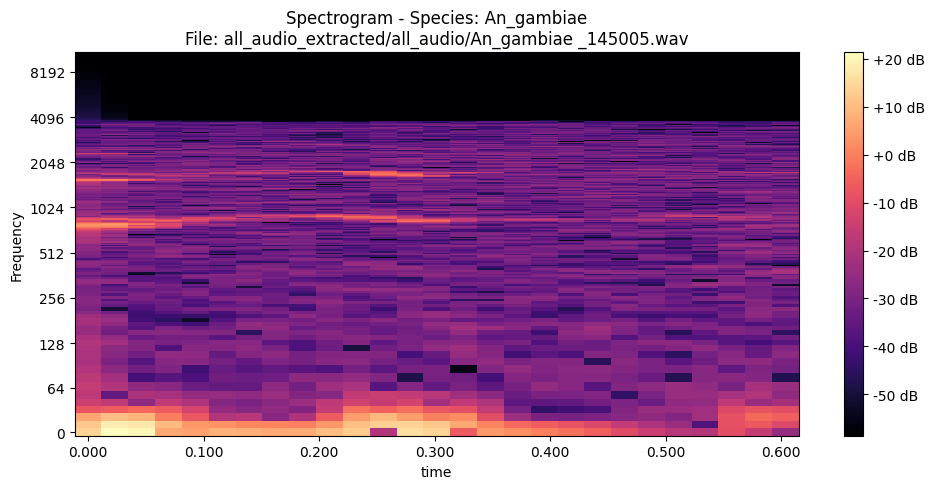

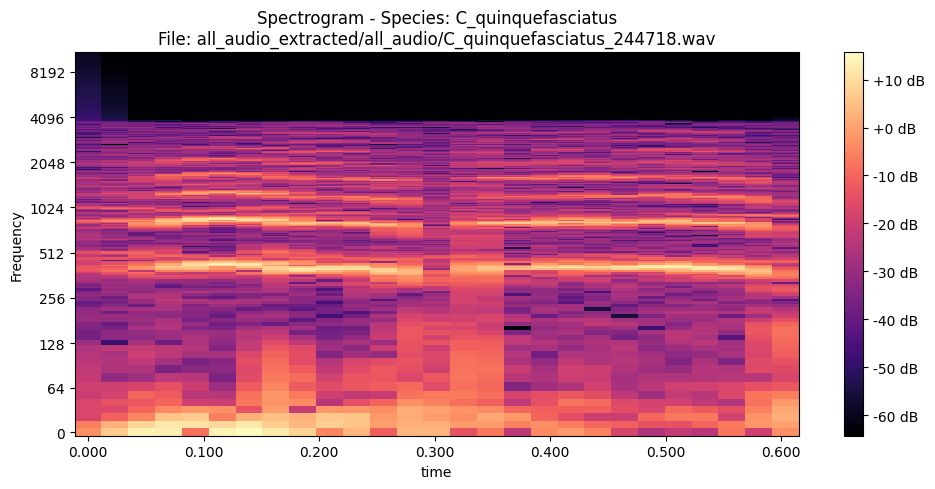

In [ ]:
#visual spectrogram on mosquito audio only
metadata_sample = metadata.groupby("species").apply(lambda x: x.sample(1,random_state=42)).reset_index(drop=True)
mosquito_files=metadata_sample["AudioPath"].tolist()
for i, row in metadata_sample.iterrows():
    file_path = row['AudioPath']
    species = row['species']
    y, sr = librosa.load(file_path)
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S))

    plt.figure(figsize=(10,5))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - Species: {species}\nFile: {file_path}")
    plt.xlabel("time")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

#metadata -multi layer  perception  encoder


#class imbalance

In [ ]:
from collections import Counter
class_count=Counter(metadata['species'])
print(class_count)

Counter({'Ae_aegypti': 20000, 'Ae_albopictus': 20000, 'An_gambiae': 20000, 'C_quinquefasciatus': 20000})


In [ ]:
class_labels=sorted(class_count.keys())
label2idx = {label: idx for idx, label in enumerate(class_labels)}
metadata["label"]=metadata['species'].map(label2idx)

In [ ]:
print(label2idx)


{'Ae_aegypti': 0, 'Ae_albopictus': 1, 'An_gambiae': 2, 'C_quinquefasciatus': 3}


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Assuming metadata is a pandas DataFrame with a 'label_idx' column
classes = np.unique(metadata["label"])
class_weights_np = compute_class_weight(class_weight='balanced',
                                        classes=classes,
                                        y=metadata["label"])

# Convert to torch tensor for use with PyTorch loss functions
class_weights = torch.tensor(class_weights_np, dtype=torch.float32).to(device)

# Optional: print class weights
print("Class weights:", class_weights)


Class weights: tensor([1., 1., 1., 1.], device='cuda:0')


In [ ]:
criterion = nn.CrossEntropyLoss(weight=class_weights)

#windowed version




#convert each window to log-mel spectrogram

In [ ]:
from skimage import exposure


def audio_to_log_mel(y, sr=8000, n_mels=64, fmax=8000):

    try:
        # 1️⃣ Compute mel spectrogram
        mel_spec = librosa.feature.melspectrogram(
            y=y,
            sr=sr,
            n_mels=n_mels,
            fmax=fmax
        )

        # 2️⃣ Convert to log scale
        log_mel = librosa.power_to_db(mel_spec, ref=np.max)

        # 3️⃣ Normalize to [0, 1] for equalization
        log_mel_norm = (log_mel - log_mel.min()) / (log_mel.max() - log_mel.min())

        # 4️⃣ Apply adaptive histogram equalization for sharpening
        log_mel_sharp = exposure.equalize_adapthist(log_mel_norm, clip_limit=0.03)

        # 5️⃣ Rescale back to original dB range
        log_mel_sharp = log_mel_sharp * (log_mel.max() - log_mel.min()) + log_mel.min()

        return log_mel_sharp

    except Exception as e:
        print(f"❌ Error converting to sharpened log-mel: {e}")
        return None


In [ ]:
num_files_to_process = len(metadata) #
processed_spectrograms = []
target_width = 20 #

# Iterate through all rows of the metadata DataFrame
for index, row in metadata.iterrows():
    audio_path = row["AudioPath"]
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=8000) # Assuming a sample rate of 8000 as used before

        # Convert to log-mel spectrogram
        log_mel = audio_to_log_mel(y, sr=sr)

        if log_mel is not None:
            # Pad or truncate the spectrogram to the target width
            if log_mel.shape[1] < target_width:
                # Pad to the right
                pad_width = target_width - log_mel.shape[1]
                log_mel = np.pad(log_mel, ((0, 0), (0, pad_width)), mode='constant')
            else:
                # Truncate if wider than target
                log_mel = log_mel[:, :target_width]


            if index < 5: #
                 print(f"Processed {audio_path}, shape: {log_mel.shape}")
            processed_spectrograms.append(log_mel)
        else:
            print(f"Failed to process {audio_path}")

    except Exception as e:
        print(f"❌ Error loading or processing {audio_path}: {type(e).__name__} - {e}")


print(f"\nFinished processing all audio files. Total spectrograms created: {len(processed_spectrograms)}")

/usr/local/lib/python3.12/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.12/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Processed all_audio_extracted/all_audio/Ae_aegypti_22840.wav, shape: (64, 20)
Processed all_audio_extracted/all_audio/Ae_aegypti_12939.wav, shape: (64, 20)
Processed all_audio_extracted/all_audio/Ae_aegypti_50302.wav, shape: (64, 20)
Processed all_audio_extracted/all_audio/Ae_aegypti_21125.wav, shape: (64, 20)
Processed all_audio_extracted/all_audio/Ae_aegypti_19101.wav, shape: (64, 20)

Finished processing all audio files. Total spectrograms created: 80000


In [ ]:
from torch.utils.data import Dataset
import torch

class LogMelWindowDataset(Dataset):
    def __init__(self, window_data, n_mels):
        self.data = window_data
        self.n_mels = n_mels

    def __len__(self):#returns the no of dataset in  the windows list
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        log_mel = item['log_mel']
        label = item['label']

        # Convert to Tensor, add channel dimension [1, n_mels, time_frames]
        log_mel_tensor = torch.tensor(log_mel, dtype=torch.float32).unsqueeze(0)

        return log_mel_tensor, label


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

# Ensure processed_spectrograms and metadata have the same number of entries
if len(processed_spectrograms) != len(metadata):
    print("Warning: The number of processed spectrograms does not match the number of entries in metadata.")
    # You might need to handle this discrepancy depending on your specific case
    # For now, we'll proceed with the minimum number of entries
    min_len = min(len(processed_spectrograms), len(metadata))
    processed_spectrograms = processed_spectrograms[:min_len]
    metadata_subset = metadata.head(min_len).copy() # Use a copy to avoid SettingWithCopyWarning
else:
    metadata_subset = metadata.copy() # Use a copy to avoid SettingWithCopyWarning


# Combine spectrograms and labels
# Assuming the order of spectrograms in processed_spectrograms corresponds to the order of rows in metadata
# If not, you would need a way to match them (e.g., using filenames or IDs)
spectrogram_data = []
for i, spec in enumerate(processed_spectrograms):
    label = metadata_subset.iloc[i]['label'] # Get label from metadata_subset
    spectrogram_data.append({'log_mel': spec, 'label': label})


# Split the data into training and validation sets
# Use stratification to maintain class distribution
train_data, val_data = train_test_split(
    spectrogram_data,
    test_size=0.25, # Using 25% for validation as in your previous split
    random_state=42,
    stratify=[d['label'] for d in spectrogram_data] # Stratify by label
)

# Define n_mels (assuming it's consistent across all spectrograms)
# You might need to adjust this if your spectrograms have varying n_mels
if processed_spectrograms:
    n_mels = processed_spectrograms[0].shape[0]
else:
    n_mels = 64 # Default value if no spectrograms were processed


# Create datasets and loaders using your existing LogMelWindowDataset class
# Assuming LogMelWindowDataset is defined in a previous cell
train_dataset = LogMelWindowDataset(train_data, n_mels=n_mels)
val_dataset = LogMelWindowDataset(val_data, n_mels=n_mels)

# Create DataLoaders
batch_size = 8 # Using the batch size from your previous DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Number of batches in training loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")

Training data size: 60000
Validation data size: 20000
Number of batches in training loader: 7500
Number of batches in validation loader: 2500


#featA convertion of audio files into spectrogram

#mozzBNNv2 model


In [ ]:
class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=8):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)

        self.mlp = nn.Sequential(
            nn.Conv2d(in_planes, in_planes // ratio, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(in_planes // ratio, in_planes, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.mlp(self.avg_pool(x))
        max_out = self.mlp(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out) * x


class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()
        padding = kernel_size // 2
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        attention = self.sigmoid(self.conv(x_cat))
        return attention * x


class CBAM(nn.Module):
    def __init__(self, channels, reduction=8, kernel_size=7):
        super(CBAM, self).__init__()
        self.ca = ChannelAttention(channels, reduction)
        self.sa = SpatialAttention(kernel_size)

    def forward(self, x):
        x = self.ca(x)
        x = self.sa(x)
        return x


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch


class mozzBNNv2(nn.Module):

    def __init__(self, input_shape=(1, 64, 20), num_classes=4, dropout_rate=0.3):
        super(mozzBNNv2, self).__init__()

        # Convolutional + BatchNorm + CBAM layers
        self.conv1 = nn.Conv2d(input_shape[0], 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.cbam1 = CBAM(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.cbam2 = CBAM(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.cbam3 = CBAM(128)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.cbam4 = CBAM(256)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(dropout_rate)

        # Calculate flatten size dynamically
        self._to_Linear = self.calculate_flatten_size(input_shape)

        # Fully connected layers
        self.fc1 = nn.Linear(self._to_Linear, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def calculate_flatten_size(self, input_shape):
        x = torch.rand(1, *input_shape)
        x = self.pool(F.relu(self.cbam1(self.bn1(self.conv1(x)))))
        x = self.pool(F.relu(self.cbam2(self.bn2(self.conv2(x)))))
        x = self.pool(F.relu(self.cbam3(self.bn3(self.conv3(x)))))
        x = F.relu(self.cbam4(self.bn4(self.conv4(x))))
        x = x.view(1, -1)
        return x.shape[1]

    def forward(self, x):
        # Conv Block 1 + CBAM
        x = self.pool(F.relu(self.cbam1(self.bn1(self.conv1(x)))))
        x = self.dropout(x)

        # Conv Block 2 + CBAM
        x = self.pool(F.relu(self.cbam2(self.bn2(self.conv2(x)))))
        x = self.dropout(x)

        # Conv Block 3 + CBAM
        x = self.pool(F.relu(self.cbam3(self.bn3(self.conv3(x)))))
        x = self.dropout(x)

        # Conv Block 4 + CBAM (no pooling)
        x = F.relu(self.cbam4(self.bn4(self.conv4(x))))
        x = self.dropout(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)

        # Convolution Block 4 (no pooling)
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.dropout(x)

        # Flatten before FC layers
        x = x.view(x.size(0), -1)

        # Fully Connected Layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return self.fc2(x)  # Final logits

#creating a pytorch  dataset


#training loop for mozznet model


In [ ]:
import torch.optim as optim#provide various optimazation algorithm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")#use cuda cuda gpu if available else cpu

# Initialize a single model using the updated class definition
# The input shape and num_classes are now defined in the mozzBNNv2 __init__
model = mozzBNNv2().to(device)

# Define loss function and optimizer for the single model
# Use the class_weights calculated in cell 03d85599
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


def train_model(model, train_loader, val_loader, epochs=15):#train model function
    for epoch in range(epochs):#loop for the 10 epoch
        model.train()#intialize the training
        running_loss, correct, total = 0.0, 0, 0#intialize tracking variables

        for inputs, labels in train_loader:#loop for train loader as it loads in batch
            inputs, labels = inputs.to(device), labels.to(device)#load inputs nad labels to device

            # Use the single optimizer and criterion
            optimizer.zero_grad()#clear gradient after every batch
            outputs = model(inputs)
            loss = criterion(outputs, labels)#labels how far the model prediction is from the true model
            loss.backward()# compute gradient for each weight
            optimizer.step()# uses gradient to adjust the weights

            running_loss += loss.item()#adds current loss and total running loss
            _, predicted = torch.max(outputs, 1)#
            total += labels.size(0)#add total number so samples in a batch
            correct += (predicted == labels).sum().item()

        train_acc = correct / total
        val_acc = evaluate_model(model, val_loader)
        print(f"Epoch {epoch+1}/{epochs} Loss: {running_loss:.4f} Train Acc: {train_acc:.4f} Val Acc: {val_acc:.4f}")

def evaluate_model(model, val_loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

# Train the single model using the available data loaders
print("Starting training for the mozzBNNv2 model...")
train_model(model, train_loader, val_loader, epochs=15)
print("Training for the mozzBNNv2 model finished.")

Starting training for the mozzBNNv2 model...
Epoch 1/15 Loss: 4573.4273 Train Acc: 0.7469 Val Acc: 0.8181
Epoch 2/15 Loss: 3758.3159 Train Acc: 0.8005 Val Acc: 0.8357
Epoch 3/15 Loss: 3537.3850 Train Acc: 0.8133 Val Acc: 0.8379
Epoch 4/15 Loss: 3402.2811 Train Acc: 0.8219 Val Acc: 0.8408
Epoch 5/15 Loss: 3305.2029 Train Acc: 0.8271 Val Acc: 0.8446
Epoch 6/15 Loss: 3252.0785 Train Acc: 0.8286 Val Acc: 0.8555
Epoch 7/15 Loss: 3181.3375 Train Acc: 0.8328 Val Acc: 0.8550
Epoch 8/15 Loss: 3119.6432 Train Acc: 0.8361 Val Acc: 0.8533
Epoch 9/15 Loss: 3060.5582 Train Acc: 0.8391 Val Acc: 0.8575
Epoch 10/15 Loss: 3026.8504 Train Acc: 0.8413 Val Acc: 0.8575
Epoch 11/15 Loss: 2992.0542 Train Acc: 0.8428 Val Acc: 0.8583
Epoch 12/15 Loss: 2972.0323 Train Acc: 0.8450 Val Acc: 0.8521
Epoch 13/15 Loss: 2929.5918 Train Acc: 0.8467 Val Acc: 0.8546
Epoch 14/15 Loss: 2923.4805 Train Acc: 0.8459 Val Acc: 0.8649
Epoch 15/15 Loss: 2899.5657 Train Acc: 0.8492 Val Acc: 0.8579
Training for the mozzBNNv2 model f

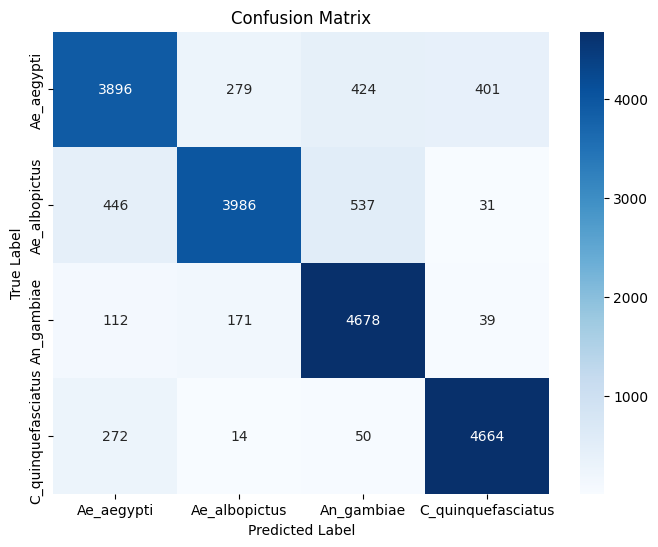

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

def plot_confusion_matrix(model, dataloader, device, class_labels):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming model, val_loader, device, and label2idx are defined from previous steps
# Use the single trained model and the validation loader
plot_confusion_matrix(model, val_loader, device, list(label2idx.keys()))

#results graph

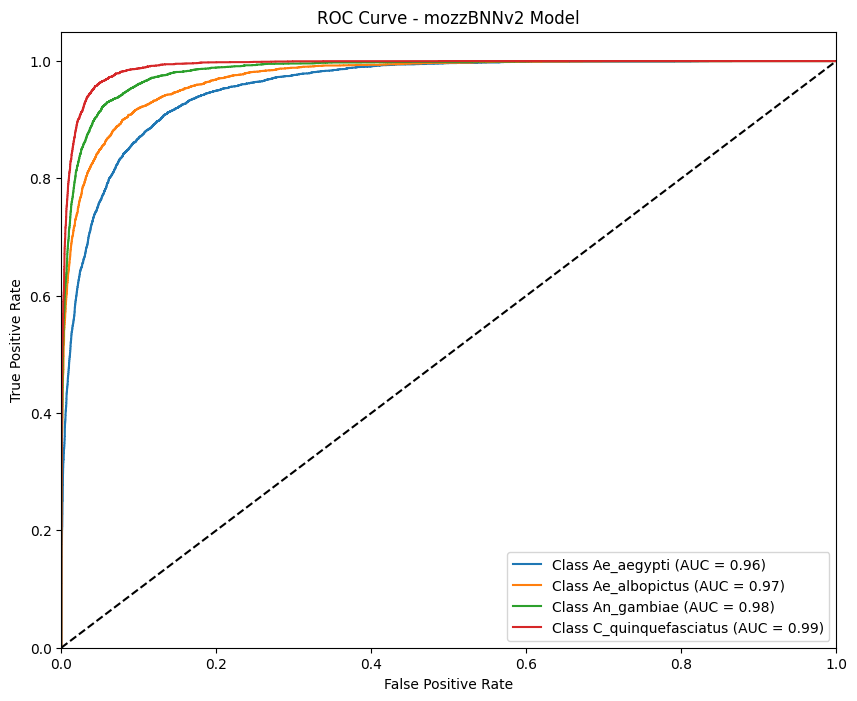

Overall ROC AUC (Macro Average) for mozzBNNv2 Model: 0.9759


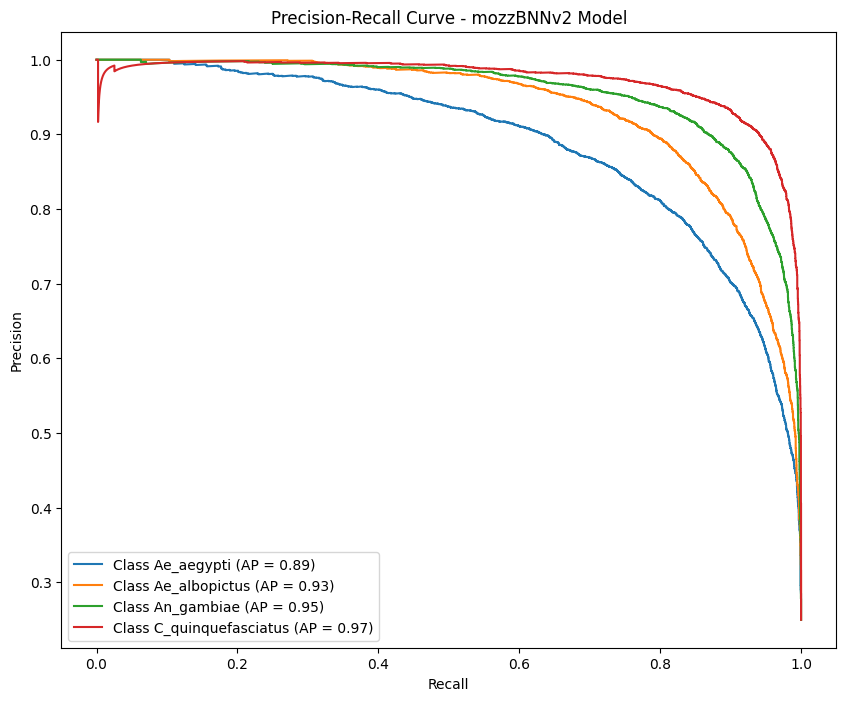

Overall Precision-Recall AUC (Macro Average) for mozzBNNv2 Model: 0.9376


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import torch.nn.functional as F

def plot_multiclass_metrics(model, dataloader, device, class_labels, model_name):
    model.eval()
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = F.softmax(outputs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    # Ensure classes are passed as a list of unique labels
    all_labels_binarized = label_binarize(all_labels, classes=np.unique(all_labels))

    # ROC AUC
    plt.figure(figsize=(10, 8))
    roc_aucs = []
    # Iterate through the actual unique labels present in the data
    for i, class_label_idx in enumerate(np.unique(all_labels)):
        # Find the corresponding class name from the label2idx mapping
        class_name = list(label2idx.keys())[list(label2idx.values()).index(class_label_idx)]

        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], np.array(all_probabilities)[:, class_label_idx])
        roc_auc = auc(fpr, tpr)
        roc_aucs.append(roc_auc)
        plt.plot(fpr, tpr, label=f'Class {class_name} (AUC = {roc_auc:.2f})')

    # Calculate overall ROC AUC (macro average)
    mean_roc_auc = np.mean(roc_aucs)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Overall ROC AUC (Macro Average) for {model_name}: {mean_roc_auc:.4f}")


    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    pr_aucs = []
     # Iterate through the actual unique labels present in the data
    for i, class_label_idx in enumerate(np.unique(all_labels)):
         # Find the corresponding class name from the label2idx mapping
        class_name = list(label2idx.keys())[list(label2idx.values()).index(class_label_idx)]

        precision, recall, _ = precision_recall_curve(all_labels_binarized[:, i], np.array(all_probabilities)[:, class_label_idx])
        pr_auc = average_precision_score(all_labels_binarized[:, i], np.array(all_probabilities)[:, class_label_idx])
        pr_aucs.append(pr_auc)
        plt.plot(recall, precision, label=f'Class {class_name} (AP = {pr_auc:.2f})')

    # Calculate overall Precision-Recall AUC (macro average)
    mean_pr_auc = np.mean(pr_aucs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

    print(f"Overall Precision-Recall AUC (Macro Average) for {model_name}: {mean_pr_auc:.4f}")


# Assuming model, val_loader, device, and label2idx are defined from previous steps
# Use the single trained model and the validation loader
plot_multiclass_metrics(model, val_loader, device, list(label2idx.keys()), "mozzBNNv2 Model")

In [ ]:


# Instantiate both models
model_A = mozzBNNv2(input_shape=(1, 64, 96), num_classes=4)




In [ ]:
# ✅ Save only the weights (state_dict)
torch.save(model_A.state_dict(), "model_a.pth")


In [ ]:
# ✅ Load both models using the updated class

model_A.load_state_dict(torch.load("model_a.pth"))
model_A.eval()



mozzBNNv2(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cbam1): CBAM(
    (ca): ChannelAttention(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (max_pool): AdaptiveMaxPool2d(output_size=1)
      (mlp): Sequential(
        (0): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): ReLU()
        (2): Conv2d(4, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (sigmoid): Sigmoid()
    )
    (sa): SpatialAttention(
      (conv): Conv2d(2, 1, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
      (sigmoid): Sigmoid()
    )
  )
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cbam2): CBAM(
    (ca): ChannelAttention(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (max_pool): Adaptive

In [ ]:
import torch
import torch.nn.functional as F
import gradio as gr
import librosa
import numpy as np

# Label map: adjust to your use case
label_map = {
    0: "Ae_aegypti",
    1: "Ae_albopictus",
    2: "An_gambiae",
    3: "C_quinquefasciatus",

}

# === FEATURE EXTRACTOR ===
def extract_features(audio_file, sr=16000, n_mels=64, width=20):
    y, sr = librosa.load(audio_file, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Ensure shape is (n_mels, width)
    if mel_db.shape[1] < width:
        # Pad to the right
        pad_width = width - mel_db.shape[1]
        mel_db = np.pad(mel_db, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mel_db = mel_db[:, :width]

    return mel_db  # shape: (64, 20)

# Instantiate model_A and load weights here
# Assuming mozzBNNv2 class is defined in a previous cell and its state_dict is saved as "model_A.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_A = mozzBNNv2(input_shape=(1, 64, 20), num_classes=4).to(device) # Instantiate with correct shape and num_classes
model_A_path = "/content/drive/MyDrive/trained_models/model_A.pth" # Path to saved model weights
try:
    model_A.load_state_dict(torch.load(model_A_path, map_location=device))
    model_A.eval() # Set model to evaluation mode
    print("Model A loaded successfully.")
except FileNotFoundError:
    print(f"Error: Model A weights not found at {model_A_path}. Please ensure the model was trained and saved correctly.")
    # You might want to exit or handle this error appropriately
except Exception as e:
    print(f"Error loading Model A weights: {e}")
    # Handle other potential loading errors

# === INFERENCE FUNCTION ===
def predict_with_both_models(audio):
    # Check if model_A was loaded successfully
    if 'model_A' not in globals() or model_A is None:
        return "Error: Model A is not loaded. Cannot perform prediction."

    feature = extract_features(audio)  # (64, 20)
    input_tensor = torch.tensor(feature).unsqueeze(0).unsqueeze(0).float()

    with torch.no_grad():
        # model_A is already on the correct device from instantiation/loading
        out_a = F.softmax(model_A(input_tensor.to(device)), dim=1).squeeze()

    # Ensure out_a has at least one element before accessing by index
    if out_a.ndim == 0: # Handle case with single class output
        pred_a = 0 # Or some other appropriate default/error handling
        confidence_a = out_a.item()
    else:
        pred_a = torch.argmax(out_a).item()
        confidence_a = out_a[pred_a].item()


    result = (
        f"🎯 Model A: {label_map[pred_a]} (Conf: {confidence_a:.2f})\n"

    )
    return result

# === GRADIO UI ===
gr.Interface(
    fn=predict_with_both_models,
    inputs=gr.Audio(type="filepath", label="Upload audio"),
    outputs=gr.Text(label="Model Predictions"),
    title="Mosquito Species Classifier",

).launch()

Error: Model A weights not found at /content/drive/MyDrive/trained_models/model_A.pth. Please ensure the model was trained and saved correctly.
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://458cdc617b67809f7b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


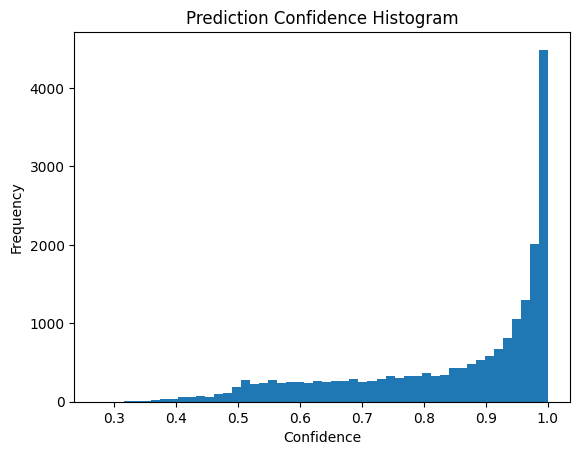

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F # Import F for softmax

# Assuming 'model', 'val_loader', and 'device' are defined from previous steps

model.eval()  # Set the model to evaluation mode
all_outputs = []

with torch.no_grad(): # Disable gradient calculation for inference
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        all_outputs.append(outputs.cpu()) # Move outputs to CPU and store

model_outputs = torch.cat(all_outputs, dim=0) # Concatenate all outputs

confidences = F.softmax(model_outputs, dim=1).max(axis=1).values # get max softmax prob for each sample
plt.hist(confidences, bins=50)
plt.title("Prediction Confidence Histogram")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()

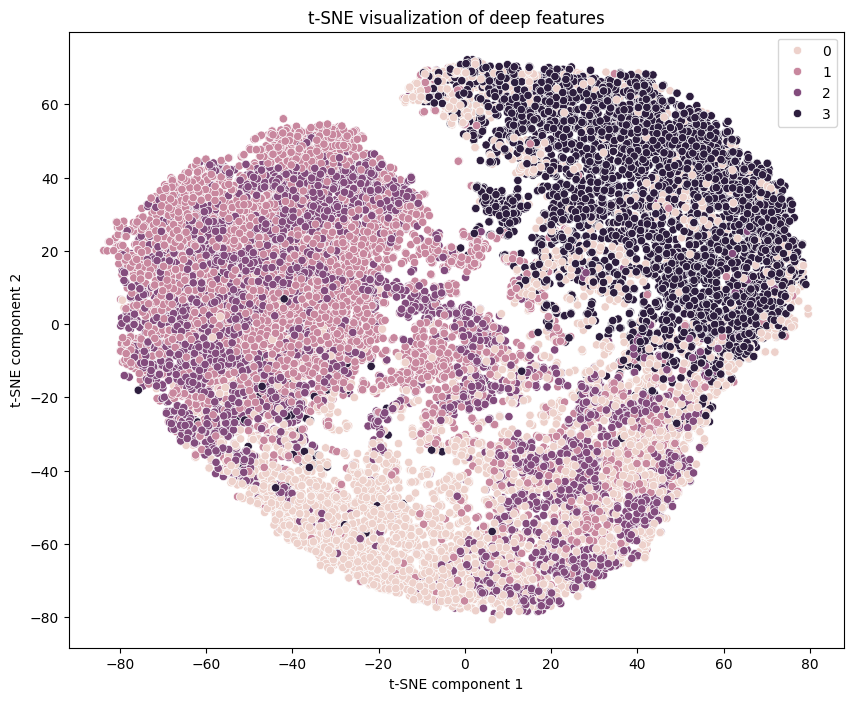

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Assuming 'model', 'val_loader', and 'device' are defined from previous steps

model.eval()  # Set the model to evaluation mode
deep_features = []
labels = []

# Extract features from the model's pooling layer
with torch.no_grad():
    for inputs, batch_labels in val_loader:
        inputs = inputs.to(device)
        # Get the output before the final classification layer
        # Assuming the last pooling layer is named 'pool' in your model
        # You might need to adjust this if your model architecture is different
        features = model.pool(model.bn3(model.conv3(model.pool(model.bn2(model.conv2(model.pool(model.bn1(model.conv1(inputs))))))))).view(inputs.size(0), -1)
        deep_features.append(features.cpu().numpy())
        labels.extend(batch_labels.cpu().numpy())

deep_features = np.concatenate(deep_features, axis=0)
labels = np.array(labels)

X_2D = TSNE(n_components=2, random_state=42).fit_transform(deep_features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=labels)
plt.title("t-SNE visualization of deep features")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

#pretrained model RESNET


#DEFINE PRETRAINED MODEL RESNET


In [ ]:
from torch.utils.data import Dataset
import torch
import torchvision.transforms as transforms
import numpy as np
from PIL import Image

class ResNetWindowDataset(Dataset):
    def __init__(self, window_data):
        self.data = window_data

        # Define the complete transform pipeline
        self.transform = transforms.Compose([
            transforms.ToPILImage(),                       # Convert numpy image to PIL
            transforms.Resize((224, 224),interpolation=Image.BILINEAR),                 # Resize to match ResNet input
            transforms.ToTensor(),                         # Convert to tensor with shape [1, 224, 224]
            transforms.Normalize(mean=[0.5], std=[0.5])    # Normalize grayscale
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        log_mel = item['log_mel']  # shape: (n_mels, time_frames)

        # Convert to float32 numpy array if not already
        log_mel = log_mel.astype(np.float32)

        # Apply transform pipeline
        img_tensor = self.transform(log_mel)

        label = item['label']
        return img_tensor, label


In [ ]:
class CBAM(nn.Module):
    def __init__(self, channels, reduction=16, kernel_size=7):
        super(CBAM, self).__init__()
        # Channel attention
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Conv2d(channels, channels // reduction, 1, bias=False)
        self.relu = nn.ReLU()
        self.fc2 = nn.Conv2d(channels // reduction, channels, 1, bias=False)
        self.sigmoid_channel = nn.Sigmoid()
        # Spatial attention
        self.conv_spatial = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.sigmoid_spatial = nn.Sigmoid()

    def forward(self, x):
        # Channel attention
        max_out = self.fc2(self.relu(self.fc1(self.max_pool(x))))
        avg_out = self.fc2(self.relu(self.fc1(self.avg_pool(x))))
        x = x * self.sigmoid_channel(max_out + avg_out)
        # Spatial attention
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        avg_out = torch.mean(x, dim=1, keepdim=True)
        spatial_out = torch.cat([max_out, avg_out], dim=1)
        x = x * self.sigmoid_spatial(self.conv_spatial(spatial_out))
        return x


In [ ]:
import torch.nn as nn
import torchvision.models as models # Corrected import
import torch.nn.functional as F

class modify_resnet18_for_bnn(nn.Module):
    def __init__(self, num_classes=4, dropout_p=0.3, pretrained=False ):
        super(modify_resnet18_for_bnn, self).__init__()
        model = models.resnet18(pretrained=pretrained) # Corrected: Use models.resnet18

        # Modify conv1 to accept 1-channel input
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=64,
            kernel_size=7,
            stride=2,
            padding=3,
            bias=False
        )
        self.bn1 = model.bn1 # Use batch normalization from the original model
        self.relu = model.relu # Use ReLU from the original model
        self.maxpool = model.maxpool # Use maxpool from the original model



        def replace_layer(original_layer, num_blocks):
            blocks = []
            for i in range(num_blocks):
                # Get original block to extract parameters
                original_block = original_layer[i]
                in_channels = original_block.conv1.in_channels
                out_channels = original_block.conv1.out_channels
                stride = original_block.conv1.stride # Get the stride. This might be an int or a tuple.

                # Handle stride based on its type
                if isinstance(stride, tuple):
                    stride = stride[0] # Take the first element if it's a tuple

                downsample = original_block.downsample if i == 0 else None #

                blocks.append(
                    BayesianBasicBlock(
                        in_channels,
                        out_channels,
                        stride=stride,
                        downsample=downsample,
                        dropout_p=dropout_p
                    )
                )
            return nn.Sequential(*blocks)

        self.layer1 = nn.Sequential(
        replace_layer(model.layer1, 2),
        CBAM(64)   # 64 channels at layer1 output
         )
        self.layer2 = nn.Sequential(
        replace_layer(model.layer2, 2),
        CBAM(128)  # 128 channels at layer2 output
         )
        self.layer3 = nn.Sequential(
        replace_layer(model.layer3, 2),
        CBAM(256)  # 256 channels at layer3 output
         )
        self.layer4 = nn.Sequential(
        replace_layer(model.layer4, 2),
        CBAM(512)  # 512 channels at layer4 output
        )

        # Replace the final classification head with dropout + FC
        self.avgpool = model.avgpool # Use avgpool from the original model
        self.fc = nn.Sequential(
            nn.Dropout(p=dropout_p),
            nn.Linear(model.fc.in_features, num_classes) # Use original in_features for the FC layer
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [ ]:
from torchvision.models.resnet import BasicBlock
class BayesianBasicBlock(BasicBlock):
    def __init__(self, *args, dropout_p=0.3, **kwargs):
        super().__init__(*args, **kwargs)
        self.dropout = nn.Dropout(p=dropout_p)

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)  # Dropout inserted here

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

In [ ]:
def evaluate_resnet_mc_dropout(model, val_loader, mc_runs=30):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Multiple stochastic forward passes
            mc_outputs = []
            for _ in range(mc_runs):
                outputs = model(inputs)
                mc_outputs.append(outputs.unsqueeze(0))  # (1, B, C)

            mc_outputs = torch.cat(mc_outputs, dim=0)     # (T, B, C)
            mean_outputs = mc_outputs.mean(dim=0)         # (B, C)

            _, predicted = torch.max(mean_outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total


In [ ]:
def train_resnet_model(model, train_loader, val_loader, epochs=18, lr=0.001):
    import torch.optim as optim
    import torch.nn as nn

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)


    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = correct / total
        val_acc = evaluate_resnet_mc_dropout(model, val_loader)  # <-- Use MC Dropout eval here

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")
# Initialize model
resnet_modelA =modify_resnet18_for_bnn(num_classes=4).to(device)
# Train on Feature Set B
print("\nTraining ResNet Model on Feature A...")
train_resnet_model(resnet_modelA, train_loader, val_loader, epochs=18)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



Training ResNet Model on Feature A...
Epoch 1/18, Loss: 10392.6266, Train Acc: 0.8155, Val Acc: 0.8612
Epoch 2/18, Loss: 8070.6435, Train Acc: 0.8591, Val Acc: 0.8747
Epoch 3/18, Loss: 7363.6508, Train Acc: 0.8711, Val Acc: 0.8852
Epoch 4/18, Loss: 6893.3674, Train Acc: 0.8808, Val Acc: 0.8849
Epoch 5/18, Loss: 6533.6993, Train Acc: 0.8863, Val Acc: 0.8887
Epoch 6/18, Loss: 6226.8729, Train Acc: 0.8911, Val Acc: 0.8878
Epoch 7/18, Loss: 5954.9822, Train Acc: 0.8963, Val Acc: 0.8902
Epoch 8/18, Loss: 5716.6792, Train Acc: 0.8993, Val Acc: 0.8921
Epoch 9/18, Loss: 5481.1436, Train Acc: 0.9040, Val Acc: 0.8986


#intialize the resnet18


#train and split ........dataloader


#training loop for resnet pretrained model


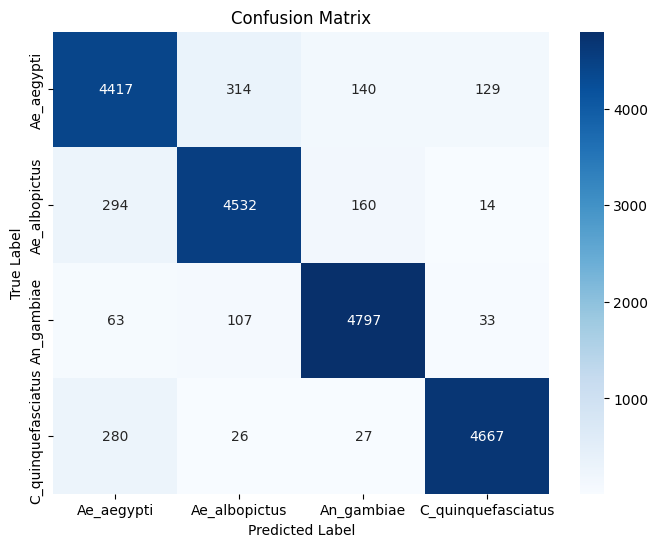

In [ ]:

    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming model, val_loader, device, and label2idx are defined from previous steps
# Use the single trained model and the validation loader
plot_confusion_matrix(resnet_modelA, val_loader, device, list(label2idx.keys()))

In [ ]:
model_B = modify_resnet18_for_bnn( num_classes=4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
torch.save(model_B.state_dict(), "model_b.pth")

In [ ]:
model_B.load_state_dict(torch.load("model_b.pth"))
model_B.eval()


modify_resnet18_for_bnn(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BayesianBasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (1): BayesianBasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum

In [ ]:
import torch
import torch.nn.functional as F
import gradio as gr
import librosa
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn # Import nn for checking instance of nn.Dropout

# Label map: adjust to your use case
label_map = {
    0: "Ae_aegypti",
    1: "Ae_albopictus",
    2: "An_gambiae",
    3: "C_quinquefasciatus",
}

# === FEATURE EXTRACTOR for ResNet18 ===
# Uses the transformation logic from ResNetWindowDataset
def extract_features_resnet(audio_file, sr=8000, n_mels=64, target_size=(224, 224)):
    y, sr = librosa.load(audio_file, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Convert to float32 numpy array
    mel_db = mel_db.astype(np.float32)

    # Apply transforms: ToPILImage, Resize, ToTensor, Normalize
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(target_size, interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]) # Grayscale normalization
    ])

    img_tensor = transform(mel_db) # Shape will be [1, target_size[0], target_size[1]]

    return img_tensor


# Instantiate ResNet18 model and load weights
# Assuming modify_resnet18_for_bnn class is defined and its state_dict is saved as "model_b.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Instantiate with correct number of classes and dropout
resnet_model = modify_resnet18_for_bnn(num_classes=4).to(device)
resnet_model_path = "model_b.pth" # Path to saved model weights

try:
    # print("Keys in loaded state_dict:", torch.load(resnet_model_path, map_location=device).keys()) # Uncomment for debugging
    resnet_model.load_state_dict(torch.load(resnet_model_path, map_location=device))
    resnet_model.eval() # Set model to evaluation mode initially
    print("ResNet18 model loaded successfully.")
except FileNotFoundError:
    print(f"Error: ResNet18 model weights not found at {resnet_model_path}. Please ensure the model was trained and saved correctly.")
    # You might want to exit or handle this error appropriately
except Exception as e:
    print(f"Error loading ResNet18 model weights: {e}")
    # Handle other potential loading errors


# === INFERENCE FUNCTION ===
def predict_with_resnet(audio):
    # Check if resnet_model was loaded successfully
    if 'resnet_model' not in globals() or resnet_model is None:
        return "Error: ResNet18 model is not loaded. Cannot perform prediction."

    feature_tensor = extract_features_resnet(audio)  # Shape: [1, 224, 224]
    # print("Input feature tensor shape:", feature_tensor.shape) # Uncomment for debugging
    # print("Input feature tensor min/max:", feature_tensor.min().item(), feature_tensor.max().item()) # Uncomment for debugging

    input_tensor = feature_tensor.unsqueeze(0).to(device) # Add batch dimension

    with torch.no_grad():
        # Use MC Dropout for inference with ResNet18
        mc_runs = 30
        mc_outputs = []

        # Set model to evaluation mode, but enable dropout layers for MC inference
        resnet_model.eval()
        for m in resnet_model.modules():
            if isinstance(m, nn.Dropout):
                m.train() # Enable dropout for MC runs

        for _ in range(mc_runs):
            outputs = resnet_model(input_tensor)
            mc_outputs.append(outputs.unsqueeze(0))  # (1, B, C)

        mc_outputs = torch.cat(mc_outputs, dim=0)     # (T, B, C)
        mean_outputs = mc_outputs.mean(dim=0).squeeze(0) # (C) - remove batch dim

        # print("Raw model outputs (logits):", mean_outputs.cpu().numpy()) # Uncomment for debugging


        # After MC runs, set model back to eval mode (dropout disabled)
        resnet_model.eval()


    probabilities = F.softmax(mean_outputs, dim=0)

    # Ensure probabilities has at least one element before accessing by index
    if probabilities.ndim == 0: # Handle case with single class output
        pred = 0 # Or some other appropriate default/error handling
        confidence = probabilities.item()
    else:
        pred = torch.argmax(probabilities).item()
        confidence = probabilities[pred].item()


    result = f"🎯 ResNet18 Model: {label_map[pred]} (Conf: {confidence:.2f})"
    return result

# === GRADIO UI ===
gr.Interface(
    fn=predict_with_resnet,
    inputs=gr.Audio(type="filepath", label="Upload audio"),
    outputs=gr.Text(label="Model Prediction (ResNet18)"),
    title="Mosquito Species Classifier (ResNet18)",
    allow_flagging="never" # Disable flagging if you don't need it
).launch()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet18 model loaded successfully.


/usr/local/lib/python3.11/dist-packages/gradio/interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6248ad4230452c7d11.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#VGGish BNN  pretrained model

### VGGish Pretrained Model

In [ ]:
# Install necessary libraries. torch, openl3 (for potential future use or reference), and soundfile are helpful for audio processing!pip install torch openl3 soundfile
!pip install torchvggish
import torch# Import the main PyTorch library.
#load the weights after downloading VGGish model weights
from torchvggish import vggish # Import necessary modules from the library
vggish_mo = vggish()# Initialize the VGGish model provided by the library


import torch.nn as nn # Import the neural network module from PyTorch, which contains base classes for layers.
import torch.nn.functional as F # Import the functional module, which contains activation functions, pooling operations, etc.

# Define the VGGish model architecture as a PyTorch Module.
# This class inherits from nn.Module, which is the base class for all neural networks in PyTorch.
class VGGish(nn.Module):
    # The constructor of the VGGish class.
    # It initializes the layers of the network.
    def __init__(self):
        # Call the constructor of the parent class (nn.Module).
        super(VGGish, self).__init__()

        # feature extractions using sequence containers
        self.features = nn.Sequential(
            #block 1
            # First Conv layer
            nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True), # Apply the Rectified Linear Unit
            # Second Conv layer
            nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)), # Max pooling layer.

            # Block 2
            # first conv layer
            nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # First Conv layer in Block 2: 64 input, 128 output.
            nn.ReLU(inplace=True),
            # second conv layer
            nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Second Conv layer in Block 2: 128 input, 128 output.
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)), # Max pooling layer.

            # Block 3
            #first conv layer
            nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # First Conv layer in Block 3: 128 input, 256 output.
            nn.ReLU(inplace=True),
            #second convo layer
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Second Conv layer in Block 3: 256 input, 256 output.
            nn.ReLU(inplace=True),
            #third convo layer
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Third Conv layer in Block 3: 256 input, 256 output.
            nn.ReLU(inplace=True),
             #third convo layer
            nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Fourth Conv layer in Block 3: 256 input, 256 output.
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)), # Max pooling layer.

            # Block 4
            #first conv layer
            nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # First Conv layer in Block 4: 256 input, 512 output.
            nn.ReLU(inplace=True),
            #second convo layer
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Second Conv layer in Block 4: 512 input, 512 output.
            nn.ReLU(inplace=True),
            #third convo layer
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Third Conv layer in Block 4: 512 input, 512 output.
            nn.ReLU(inplace=True),
            #third convo layer
            nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), # Fourth Conv layer in Block 4: 512 input, 512 output.
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)) # Max pooling layer.
        )


        self.embeddings = nn.Sequential(
            nn.Linear(512 * 6 * 4, 4096), # First fully connected layer: maps from the flattened output of conv layers to 4096 features. You need to replace '?' with the calculated flattened size.
            nn.ReLU(inplace=True), # Apply ReLU activation.
            nn.Linear(4096, 4096), # Second fully connected layer: maps from 4096 to 4096 features.
            nn.ReLU(inplace=True), # Apply ReLU activation.
            nn.Linear(4096, 128), # Third fully connected layer: maps from 4096 to 128 features (the standard VGGish embedding size).
            nn.ReLU(inplace=True) # Apply ReLU activation.
        )

    # Define the forward pass of the model.
    # This method specifies how the input tensor is processed through the layers.
    def forward(self, x):
        x = self.features(x) # Pass the input tensor through the feature extraction (convolutional and pooling) layers.
        x = x.view(x.size(0), -1) # Flatten the output tensor from the convolutional layers into a 1D tensor while keeping the batch size. x.size(0) gets the batch size. -1 infers the remaining dimension.
        x = self.embeddings(x) # Pass the flattened tensor through the embedding (fully connected) layers.
        return x # Return the final embedding vector.



In [ ]:
from torch.utils.data import Dataset
import torch
import numpy as np

class VGGishDatasetMSC(Dataset):
    def __init__(self, window_data):
        self.data = window_data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        log_mel = item['log_mel']  # (64, 96)
        label = item['label']

        # Reshape to [1, 64, 96]
        log_mel = np.expand_dims(log_mel, axis=0) # Add channel dimension
        log_mel_tensor = torch.tensor(log_mel).float()  # [1, 64, 96]
        return log_mel_tensor, label

In [ ]:
import torch.nn as nn

class BayesianVGGishClassifierMSC(nn.Module):
    def __init__(self, num_classes=8, dropout_p=0.3):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(dropout_p),     # Dropout 1
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(dropout_p),     # Dropout 2
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc(x)


In [ ]:
def evaluate_mc_dropout(model, vggish, val_loader, mc_runs=30):
    model.train()  # ← Keep dropout ON!
    vggish.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Get MC predictions
            mc_outputs = []
            for _ in range(mc_runs):
                emb = vggish(inputs)
                logits = model(emb)
                mc_outputs.append(logits.unsqueeze(0))

            mc_outputs = torch.cat(mc_outputs, dim=0)  # [T, B, C]
            mean_output = mc_outputs.mean(dim=0)       # [B, C]

            _, predicted = torch.max(mean_output, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total
    return acc


In [ ]:
def train_vggish_msc(vggish_model, classifier, train_loader, val_loader, epochs=15, lr=1e-4):
    vggish_model.eval()  # Freeze VGGish
    classifier.train()

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Move models to the device
    vggish_model.to(device)
    classifier.to(device)

    # Explicitly move VGGish postprocessing parameters to the device
    if hasattr(vggish_model, 'pproc') and vggish_model.pproc is not None:
        if hasattr(vggish_model.pproc, '_pca_matrix') and vggish_model.pproc._pca_matrix is not None:
            vggish_model.pproc._pca_matrix = vggish_model.pproc._pca_matrix.to(device)
        if hasattr(vggish_model.pproc, '_pca_means') and vggish_model.pproc._pca_means is not None:
             vggish_model.pproc._pca_means = vggish_model.pproc._pca_means.to(device)


    optimizer = torch.optim.Adam(classifier.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        running_loss, correct, total = 0.0, 0, 0
        classifier.train()

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            with torch.no_grad():
                embeddings = vggish_model(inputs)  # [B, 128]

            outputs = classifier(embeddings)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = correct / total

        # Validation
       # Use MC Dropout during validation
        val_acc = evaluate_mc_dropout(classifier, vggish_model, val_loader)


        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")
from torchvggish import vggish

vggish_model = vggish()  # Pretrained VGGish
classifier = BayesianVGGishClassifierMSC(num_classes=4)

train_vggish_msc(vggish_model, classifier, train_loader, val_loader)

NameError: name 'BayesianVGGishClassifierMSC' is not defined

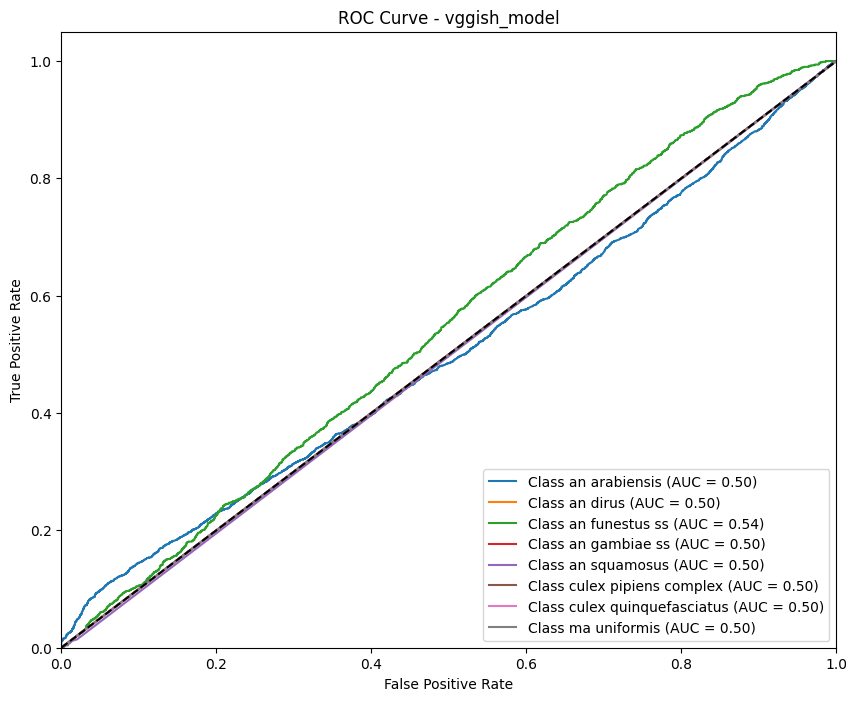

Overall ROC AUC (Macro Average) for vggish_model: 0.5049


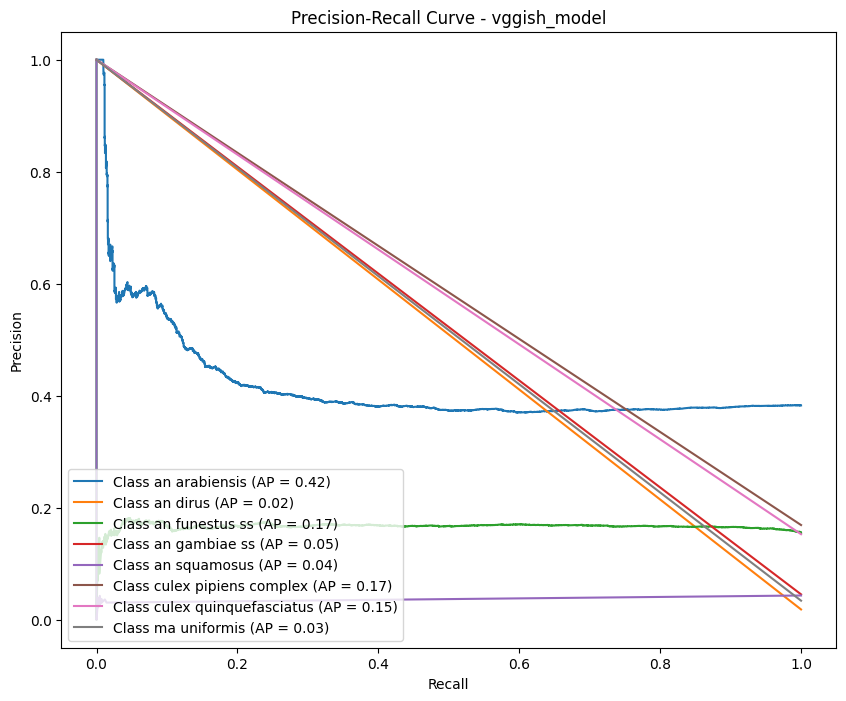

Overall Precision-Recall AUC (Macro Average) for vggish_model: 0.1308


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np
import torch.nn.functional as F

def plot_multiclass_metrics(model, dataloader, device, class_labels, model_name):
    model.eval()
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probabilities = F.softmax(outputs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    all_labels_binarized = label_binarize(all_labels, classes=np.arange(len(class_labels)))

    # ROC AUC
    plt.figure(figsize=(10, 8))
    roc_aucs = []
    for i in range(len(class_labels)):
        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], np.array(all_probabilities)[:, i])
        roc_auc = auc(fpr, tpr)
        roc_aucs.append(roc_auc)
        plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

    # Calculate overall ROC AUC (macro average)
    mean_roc_auc = np.mean(roc_aucs)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"Overall ROC AUC (Macro Average) for {model_name}: {mean_roc_auc:.4f}")


    # Precision-Recall Curve
    plt.figure(figsize=(10, 8))
    pr_aucs = []
    for i in range(len(class_labels)):
        precision, recall, _ = precision_recall_curve(all_labels_binarized[:, i], np.array(all_probabilities)[:, i])
        pr_auc = average_precision_score(all_labels_binarized[:, i], np.array(all_probabilities)[:, i])
        pr_aucs.append(pr_auc)
        plt.plot(recall, precision, label=f'Class {class_labels[i]} (AP = {pr_auc:.2f})')

    # Calculate overall Precision-Recall AUC (macro average)
    mean_pr_auc = np.mean(pr_aucs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.show()

    print(f"Overall Precision-Recall AUC (Macro Average) for {model_name}: {mean_pr_auc:.4f}")


# Assuming model_A, val_loaderA, model_B, val_loaderB, device, and class_labels are defined
plot_multiclass_metrics(vggish_model, val_loader, device, class_labels, "vggish_model")


In [ ]:
# Process the first few audio files from the metadata
num_files_to_process = len(metadata) # Process all files
processed_spectrograms = []
target_width = 96 # VGGish expects a width of 96 time frames

# Iterate through all rows of the metadata DataFrame
for index, row in metadata.iterrows():
    audio_path = row["AudioPath"]
    try:
        # Load the audio file
        y, sr = librosa.load(audio_path, sr=8000) # Assuming a sample rate of 8000 as used before

        # Convert to log-mel spectrogram
        log_mel = audio_to_log_mel(y, sr=sr)

        if log_mel is not None:
            # Pad or truncate the spectrogram to the target width
            if log_mel.shape[1] < target_width:
                # Pad to the right
                pad_width = target_width - log_mel.shape[1]
                log_mel = np.pad(log_mel, ((0, 0), (0, pad_width)), mode='constant')
            else:
                # Truncate if wider than target
                log_mel = log_mel[:, :target_width]

            # Optionally, you might want to store these or process them further
            # For now, we'll just print a confirmation for the first few
            if index < 5: # Print for the first 5 files as a sample
                 print(f"Processed {audio_path}, shape: {log_mel.shape}")
            processed_spectrograms.append(log_mel)
        else:
            print(f"Failed to process {audio_path}")

    except Exception as e:
        print(f"❌ Error loading or processing {audio_path}: {type(e).__name__} - {e}")

# You can now work with the processed_spectrograms list
# For example, you could store these or use them to create a dataset
print(f"\nFinished processing all audio files. Total spectrograms created: {len(processed_spectrograms)}")

/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Processed all_audio_extracted/all_audio/Ae_aegypti_003.wav, shape: (64, 96)
Processed all_audio_extracted/all_audio/Ae_aegypti_004.wav, shape: (64, 96)
Processed all_audio_extracted/all_audio/Ae_aegypti_005.wav, shape: (64, 96)
Processed all_audio_extracted/all_audio/Ae_aegypti_006.wav, shape: (64, 96)
Processed all_audio_extracted/all_audio/Ae_aegypti_009.wav, shape: (64, 96)


In [ ]:
# Subsample the dataset to 20000 samples per species
subsampled_metadata = metadata.groupby('species').apply(lambda x: x.sample(min(len(x), 20000), random_state=42)).reset_index(drop=True)
metadata = subsampled_metadata # Update metadata with the subsampled data

print("\nSubsampled dataset distribution:")
print(metadata["species"].value_counts())
print("\nSubsampled metadata head:")
print(metadata.head())


Subsampled dataset distribution:
species
Ae_aegypti            20000
Ae_albopictus         20000
An_gambiae            20000
C_quinquefasciatus    20000
Name: count, dtype: int64

Subsampled metadata head:
       id                 filename species 001                field  \
0  108073    ./C_pipiens_17316.wav   C_pipiens    ./C_pipiens_17316   
1  104540    ./C_pipiens_14089.wav   C_pipiens    ./C_pipiens_14089   
2   18046  ./Ae_aegypti_168264.wav  Ae_aegypti  ./Ae_aegypti_168264   
3  107459     ./C_pipiens_1672.wav   C_pipiens     ./C_pipiens_1672   
4    6805   ./Ae_aegypti_91252.wav  Ae_aegypti   ./Ae_aegypti_91252   

            fieldid     species  \
0  Ae_aegypti_22840  Ae_aegypti   
1  Ae_aegypti_12939  Ae_aegypti   
2  Ae_aegypti_50302  Ae_aegypti   
3  Ae_aegypti_21125  Ae_aegypti   
4  Ae_aegypti_19101  Ae_aegypti   

                                           AudioPath  label  
0  all_audio_extracted/all_audio/Ae_aegypti_22840...      0  
1  all_audio_extracted/all_audi

/tmp/ipython-input-57949833.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subsampled_metadata = metadata.groupby('species').apply(lambda x: x.sample(min(len(x), 20000), random_state=42)).reset_index(drop=True)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

def plot_confusion_matrix(model, dataloader, device, class_labels):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming model, val_loader, device, and label2idx are defined from previous steps
# Use the single trained model and the validation loader
plot_confusion_matrix(model, val_loader, device, list(label2idx.keys()))

In [ ]:
import torch
import torch.nn.functional as F
import gradio as gr
import librosa
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn # Import nn for checking instance of nn.Dropout

# Label map: adjust to your use case
label_map = {
    0: "Ae_aegypti",
    1: "Ae_albopictus",
    2: "An_gambiae",
    3: "C_quinquefasciatus",
}

# === FEATURE EXTRACTOR for ResNet18 ===
# Uses the transformation logic from ResNetWindowDataset
def extract_features_resnet(audio_file, sr=8000, n_mels=64, target_size=(224, 224)):
    y, sr = librosa.load(audio_file, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Convert to float32 numpy array
    mel_db = mel_db.astype(np.float32)

    # Apply transforms: ToPILImage, Resize, ToTensor, Normalize
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(target_size, interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5]) # Grayscale normalization
    ])

    img_tensor = transform(mel_db) # Shape will be [1, target_size[0], target_size[1]]

    return img_tensor


# Instantiate ResNet18 model and load weights
# Assuming modify_resnet18_for_bnn class is defined and its state_dict is saved as "model_b.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Instantiate with correct number of classes and dropout
resnet_model = modify_resnet18_for_bnn(num_classes=4).to(device)
resnet_model_path = "model_b.pth" # Path to saved model weights

try:
    # print("Keys in loaded state_dict:", torch.load(resnet_model_path, map_location=device).keys()) # Uncomment for debugging
    resnet_model.load_state_dict(torch.load(resnet_model_path, map_location=device))
    resnet_model.eval() # Set model to evaluation mode initially
    print("ResNet18 model loaded successfully.")
except FileNotFoundError:
    print(f"Error: ResNet18 model weights not found at {resnet_model_path}. Please ensure the model was trained and saved correctly.")
    # You might want to exit or handle this error appropriately
except Exception as e:
    print(f"Error loading ResNet18 model weights: {e}")
    # Handle other potential loading errors


# === INFERENCE FUNCTION ===
def predict_with_resnet(audio):
    # Check if resnet_model was loaded successfully
    if 'resnet_model' not in globals() or resnet_model is None:
        return "Error: ResNet18 model is not loaded. Cannot perform prediction."

    feature_tensor = extract_features_resnet(audio)  # Shape: [1, 224, 224]
    # print("Input feature tensor shape:", feature_tensor.shape) # Uncomment for debugging
    # print("Input feature tensor min/max:", feature_tensor.min().item(), feature_tensor.max().item()) # Uncomment for debugging

    input_tensor = feature_tensor.unsqueeze(0).to(device) # Add batch dimension

    with torch.no_grad():
        # Use MC Dropout for inference with ResNet18
        mc_runs = 30
        mc_outputs = []

        # Set model to evaluation mode, but enable dropout layers for MC inference
        resnet_model.eval()
        for m in resnet_model.modules():
            if isinstance(m, nn.Dropout):
                m.train() # Enable dropout for MC runs

        for _ in range(mc_runs):
            outputs = resnet_model(input_tensor)
            mc_outputs.append(outputs.unsqueeze(0))  # (1, B, C)

        mc_outputs = torch.cat(mc_outputs, dim=0)     # (T, B, C)
        mean_outputs = mc_outputs.mean(dim=0).squeeze(0) # (C) - remove batch dim

        # print("Raw model outputs (logits):", mean_outputs.cpu().numpy()) # Uncomment for debugging


        # After MC runs, set model back to eval mode (dropout disabled)
        resnet_model.eval()


    probabilities = F.softmax(mean_outputs, dim=0)

    # Ensure probabilities has at least one element before accessing by index
    if probabilities.ndim == 0: # Handle case with single class output
        pred = 0 # Or some other appropriate default/error handling
        confidence = probabilities.item()
    else:
        pred = torch.argmax(probabilities).item()
        confidence = probabilities[pred].item()


    result = f"🎯 ResNet18 Model: {label_map[pred]} (Conf: {confidence:.2f})"
    return result

# === GRADIO UI ===
gr.Interface(
    fn=predict_with_resnet,
    inputs=gr.Audio(type="filepath", label="Upload audio"),
    outputs=gr.Text(label="Model Prediction (ResNet18)"),
    title="Mosquito Species Classifier (ResNet18)",
    allow_flagging="never" # Disable flagging if you don't need it
).launch()